In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [30]:
file_id = "1Gh32OYm9hj72fz2q2DQwrmN_TPm8_cEx"
url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(url)

In [31]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [32]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

categorical = [n for n in X.columns if X.dtypes[n]=='object']
print(categorical)

['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [33]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical)], remainder='passthrough')
ct.fit(X)
X = ct.transform(X)

In [34]:
X

array([[1.      , 0.      , 0.      , ..., 2.      , 0.      , 1.      ],
       [1.      , 0.      , 0.      , ..., 3.      , 3.      , 0.      ],
       [0.      , 1.      , 0.      , ..., 2.      , 2.      , 1.      ],
       ...,
       [1.      , 0.      , 0.      , ..., 2.054193, 1.414209, 0.646288],
       [1.      , 0.      , 0.      , ..., 2.852339, 1.139107, 0.586035],
       [1.      , 0.      , 0.      , ..., 2.863513, 1.026452, 0.714137]])

In [35]:
le = LabelEncoder()
y = le.fit_transform(y)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_predRfC = rfc.predict(X_test)
y_predRfC
print(accuracy_score(y_test, y_predRfC, normalize=True, sample_weight=None))

0.9432624113475178


In [38]:
rfc.fit(X_train, y_train)
y_predRfC = rfc.predict(X_test)
y_predRfC
print(accuracy_score(y_test, y_predRfC, normalize=True, sample_weight=None))

0.9408983451536643


In [39]:
print(y_predRfC)

[0 4 0 0 5 0 3 5 2 0 2 4 3 3 4 6 4 3 2 6 2 5 4 2 1 6 6 4 4 0 4 5 6 1 0 4 2
 1 1 1 1 3 1 1 5 0 3 1 2 3 1 1 1 5 0 5 3 3 5 3 1 4 6 0 3 2 1 4 0 1 6 6 0 0
 5 3 3 5 4 3 1 2 3 3 2 2 1 6 1 6 6 3 0 1 6 0 1 2 5 3 2 2 4 2 6 2 1 4 4 3 2
 1 2 1 0 2 2 3 6 1 4 3 2 5 1 3 2 2 4 3 4 3 1 2 6 4 0 4 1 2 5 6 0 0 1 3 2 4
 0 2 0 0 1 3 2 5 6 5 0 0 1 1 2 0 3 0 3 1 5 6 1 1 3 4 2 6 2 6 2 1 0 3 0 5 3
 2 5 4 3 3 0 4 0 1 4 1 3 2 4 0 3 3 4 4 1 4 5 5 2 4 5 2 0 2 3 0 5 3 3 2 4 6
 3 5 3 6 0 4 5 5 5 4 1 5 1 2 2 2 2 0 6 6 5 2 1 2 1 2 1 0 5 2 0 5 1 6 2 3 2
 2 4 4 5 2 2 4 4 1 1 4 3 4 6 2 3 2 3 4 3 0 0 5 6 4 4 5 2 6 0 3 2 5 1 2 0 5
 3 3 6 6 1 5 0 0 5 1 6 5 6 4 5 3 1 4 5 6 2 4 6 1 0 1 4 0 1 4 2 2 4 1 1 1 3
 4 2 5 2 0 0 1 2 4 6 2 4 3 5 2 5 6 6 4 6 1 0 6 6 6 5 6 6 3 2 2 3 4 2 6 5 4
 0 2 1 3 2 5 0 0 2 2 6 6 1 0 4 5 4 4 1 2 3 5 4 6 3 5 0 4 1 4 1 0 1 5 2 1 0
 4 1 4 6 5 5 5 4 0 1 2 5 3 1 3 6]


In [40]:
def get_integer_mapping(le):
    res = {}
    for cl in le.classes_:
        res.update({cl:le.transform([cl])[0]})

    return res

integer_mapper = get_integer_mapping(le)
print(integer_mapper)

{'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_predRfC)
cm

array([[54,  2,  0,  0,  0,  0,  0],
       [ 2, 56,  0,  0,  0,  4,  0],
       [ 0,  2, 73,  2,  0,  0,  1],
       [ 0,  0,  1, 57,  0,  0,  0],
       [ 0,  0,  0,  0, 63,  0,  0],
       [ 0,  7,  0,  0,  0, 48,  1],
       [ 0,  1,  0,  0,  0,  2, 47]], dtype=int64)

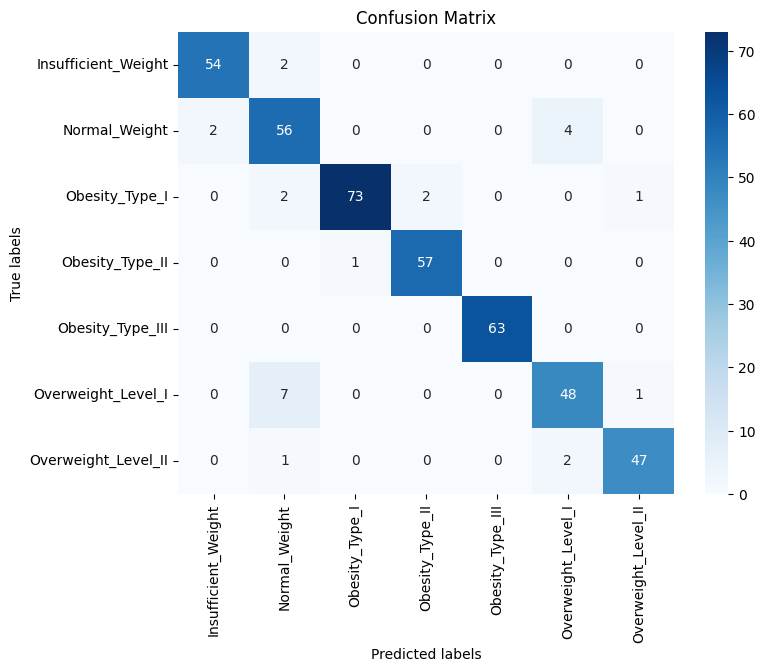

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=integer_mapper, yticklabels=integer_mapper)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [43]:
print(classification_report(y_test, y_predRfC))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        56
           1       0.82      0.90      0.86        62
           2       0.99      0.94      0.96        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.89      0.86      0.87        56
           6       0.96      0.94      0.95        50

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



In [45]:
import joblib

#joblib.dump(rfc, 'rfcModel.pkl')
#z = list(X_train.columns)
#joblib.dump(z, 'model_columns.pkl')
#print(np.array2string(X_test, threshold=np.inf))
#print(X_test)

In [46]:
x =[[1.0, 0.0, 0.0, 1.0\
  ,0.0, 1.0+00, 1.0, 0.0+00\
  ,0.0, 0.0+00, 1.0, 0.0+00\
  ,1.0, 0.0+00, 0.0, 0.0+00\
  ,0.0, 1.0+00, 0.0, 0.0+00\
  ,0.0, 1.0+00, 0.0, 2.3\
  ,1.6, 8, 2.0, 3.0+00\
  ,2.0, 0.0+00, 2.0]]
rfc.predict(x)

array([1])

In [47]:
joblib.dump(ct, "encoder.joblib")

['encoder.joblib']